/dev/ttyACM0


<IPython.core.display.Javascript object>


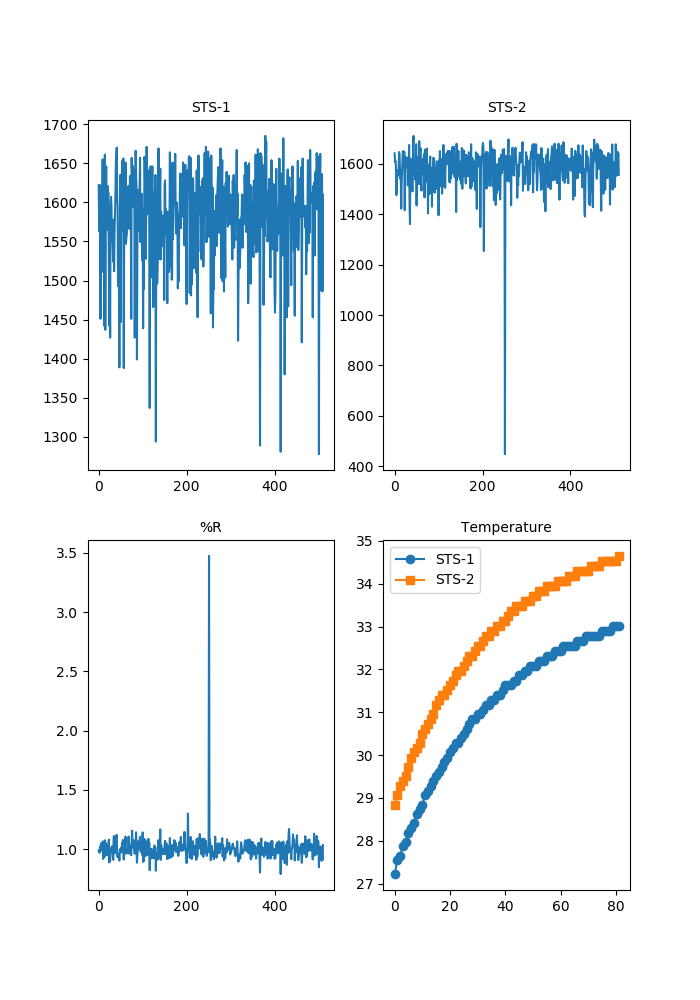

In [1]:
import serial
import re
import numpy as np
from matplotlib import pyplot as plt
from time import time
import serial.tools.list_ports
%matplotlib notebook

ports = list(serial.tools.list_ports.comports())
a=ports[0][0] 
print str(a)
fig, ((ax,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(7, 10))

ax.set_title('STS-1', fontsize=10)
ax2.set_title('STS-2', fontsize=10)
ax3.set_title('%R', fontsize=10)
ax4.set_title('Temperature', fontsize=10)

fig.show()
fig.canvas.draw()

# If you're not using Linux, you'll need to change this
# check the Arduino IDE to see what serial port it's attached to
M=0
Qn=''
pt=0
pt2=0

tpt=0
tpt2=0

ser = serial.Serial(a, 57600)
ser.flushInput()
dx=[]
dx2=[]

t1=[]
t2=[]

avdx=[]


while True:
    Qn=ser.readline()
    M+=1
    
    if Qn!='':
        
        if pt==1:
            #print Qn
            data=Qn.replace("STOP!","")
            dx=data.split(";")
            
            ax.clear()
            ax.plot(dx[0:len(dx)-2])
            if len(dx2)>0:
                ax2.clear()
                ax2.plot(dx2[0:len(dx2)-2])
            ax.set_title('STS-1', fontsize=10)
            ax2.set_title('STS-2', fontsize=10)
            fig.canvas.draw()
            
            
        if pt2==1:
            data2=Qn.replace("S2OP!","")
            #data2 = data2.replace(" ","")
            dx2=data2.split(";")
            #print dx2
            if len(dx2)>0:
                #print dx2
                ax2.clear()
                ax2.plot(dx2[0:len(dx2)-2])
            #print dx2
                if len(dx)>0:
                    ax.clear()
                    ax.plot(dx[0:len(dx)-2])
                ax.set_title('STS-1', fontsize=10)
                ax2.set_title('STS-2', fontsize=10)    
                fig.canvas.draw()
            
              
        if len(dx)>0 and len(dx2)>0:
            avdx=[]
            ax3.clear()
            avdx=[float(x)/float(y) for x, y in zip(dx[0:len(dx)-2], dx2[0:len(dx2)-2])]
            #ax.set_title('STS-1', fontsize=10)
            #ax2.set_title('STS-2', fontsize=10)
            ax3.plot(avdx)
            ax3.set_title('%R', fontsize=10)
            
            ax4.clear()
            ax4.set_title('Temperature', fontsize=10)
            ax4.plot(t1,"o-",label="STS-1")
            ax4.plot(t2,"s-",label="STS-2")
            legend = ax4.legend(loc='upper left')
            
            fig.canvas.draw()
            
            #print data
        if Qn.find("DUMP!", 0, len(Qn))!= -1:
            #print("wowowowowow")
            pt=1
        
        if Qn.find('STOP!',0,len(Qn))!=-1:
            #print("CUCA")
            pt=0
            
        if Qn.find("TA", 0, len(Qn))!= -1:
            #print("wowowowowow")
            tn1=Qn.replace("TA:","")
            tn1x=tn1.replace("\n","")
            t1.append(float(tn1x))
            #print t1
            #print Qn
            #tpt=1
        
        #if Qn.find('TST!',0,len(Qn))!=-1:
        #    print("CUCA")
        #    print Qn
        #    tpt=0
        
        if Qn.find("D2MP!", 0, len(Qn))!= -1:
            #print("wowowowowow")
            pt2=1
        
        if Qn.find('S2OP!',0,len(Qn))!=-1:
            #print("CUCA")
            pt2=0
        
        if Qn.find("TB", 0, len(Qn))!= -1:
            #print("wowowowowow")
            tn2=Qn.replace("TB:","")
            tn2x=tn2.replace("\n","")
            t2.append(float(tn2x))
   
    if M==1000:
        break
        
    #print M